In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import ast
import io
import plotly.express as px
import folium
from folium.plugins import MeasureControl
import branca
import seaborn as sns; sns.set()
import colorcet as cc
from folium.features import DivIcon
from folium.plugins import HeatMap

In [69]:
data = pd.read_csv('/data9/GR6901/work/garimar/soil_data.csv')
data.set_index('XRF number',inplace=True)
data

,info,Lead concentration (ppm),Error (ppm),Lead visual desc number,Lead visual desc desc,pH,gps-Latitude,gps-Longitude,gps-Altitude
XRF number,,,,,,,,,
1555.0,Crop field with barley,464.0,17.0,2.0,low,acidic,51.910843,10.510960,258.7
1559.0,Barley field in contaminated area,383.0,16.0,2.0,low,NaN,51.910840,10.510907,250.9
1557.0,Bottom of slag hip near the path,2241.0,39.0,6.0,high,acidic,51.910128,10.509704,264.2
1556.0,Slag heap,9189.0,95.0,6.0,high,acidic,51.910076,10.509595,253.5
1563.0,Slag heap metallophytes near birch tree,8115.0,79.0,6.0,high,acidic,51.910152,10.509579,220.9
...,...,...,...,...,...,...,...,...,...
1597.0,"Near wheel tracks, amongst blueberries",1703.0,33.0,2.0,low,NaN,51.892563,10.421937,406.8
1598.0,Tail at stop 3 near restaurant,1327.0,28.0,2.0,low,NaN,51.862207,10.296524,404.6
1599.0,"KS 4th site, near metallophytes but little gre...",10200.0,100.0,2.0,low,NaN,51.941335,10.348589,238.7


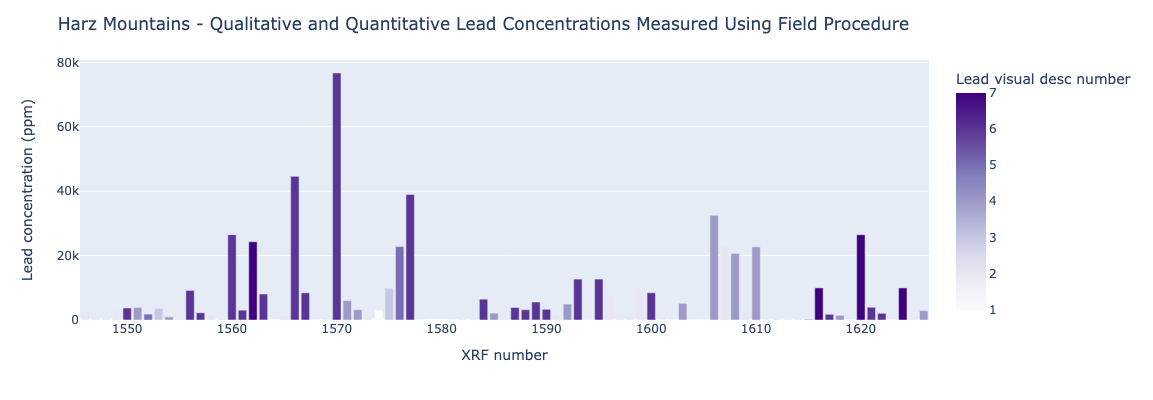

In [102]:
fig = px.bar(data, x=data.index, y=data['Lead concentration (ppm)'], color='Lead visual desc number',color_continuous_scale=px.colors.sequential.Purples)
fig.update_layout(height=400,width=1100, title_text='Harz Mountains - Qualitative and Quantitative Lead Concentrations Measured Using Field Procedure')
fig.show()


In [5]:
sorted_data = data.sort_values(by='Lead concentration (ppm)').reset_index()
sorted_data

,XRF number,info,Lead concentration (ppm),Error (ppm),Lead visual desc number,Lead visual desc desc,pH,gps-Latitude,gps-Longitude,gps-Altitude
0,1619.0,Pit fill,21.0,4.0,2.0,low,NaN,51.891981,10.422152,414.9
1,1604.0,"right underneath where the car was parked, tow...",37.0,7.0,1.0,orange,Too acidic; limestone road,51.941335,10.349272,192.1
2,1605.0,"right underneath where the car was parked, tow...",39.0,7.0,1.0,orange,Too acidic; limestone road,51.941312,10.349232,191.8
3,1602.0,"area with sign of ""Lebensgefahr"" where we park...",44.0,6.0,2.0,low,NaN,51.941336,10.349422,192.5
4,1578.0,in the filled-in area,59.0,7.0,2.0,low,acidic,51.892027,10.421844,416.5
...,...,...,...,...,...,...,...,...,...,...
77,1566.0,at the archaeological dig,44600.0,400.0,6.0,high,acidic,51.890107,10.422107,420.3
78,1570.0,at the archaeological dig,76700.0,500.0,6.0,high,NaN,51.890086,10.421756,381.2
79,NaN,Snail on soil,NaN,NaN,NaN,NaN,NaN,51.862169,10.297186,410.6
80,NaN,Field below slag heap by railway. Plant sample,NaN,NaN,NaN,NaN,NaN,51.910968,10.506541,268.6


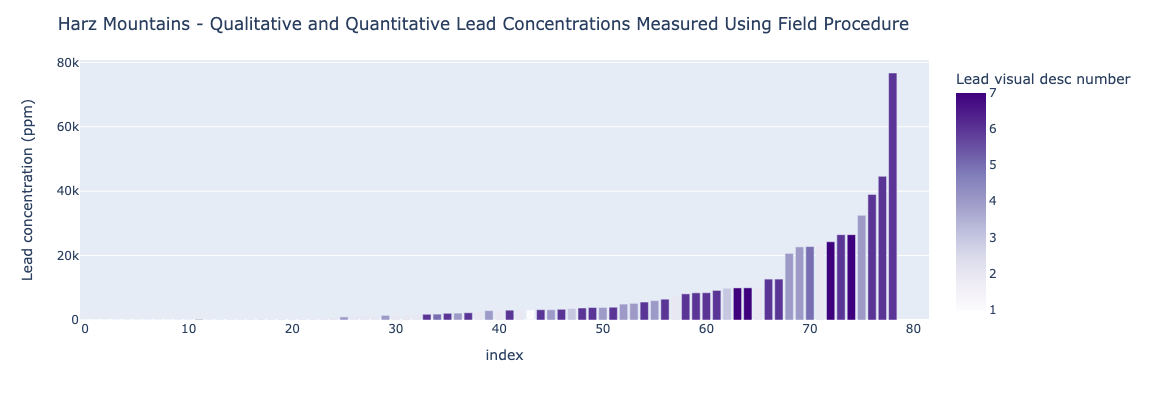

In [101]:
fig = px.bar(sorted_data, x=sorted_data.index, y=sorted_data['Lead concentration (ppm)'], color=sorted_data['Lead visual desc number'],color_continuous_scale=px.colors.sequential.Purples)
fig.update_layout(height=400,width=1100, title_text='Harz Mountains - Qualitative and Quantitative Lead Concentrations Measured Using Field Procedure')
fig.show()

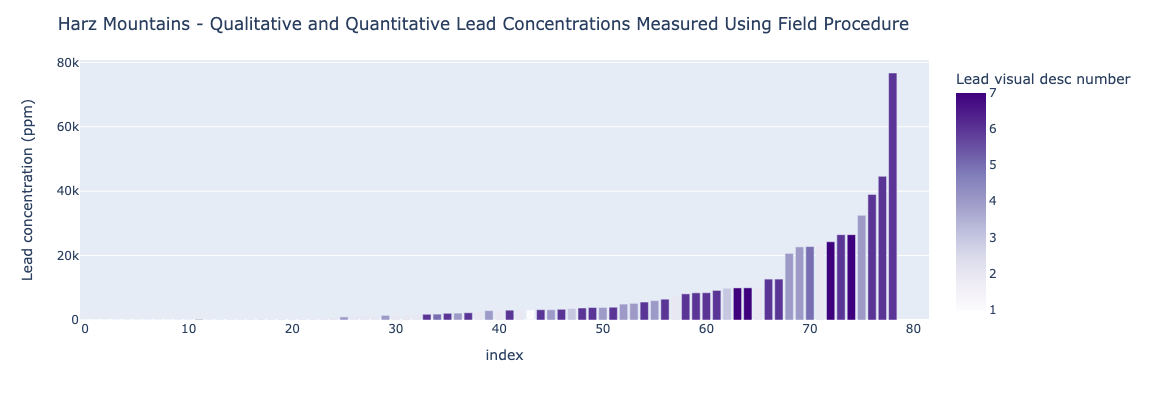

In [103]:
fig = px.bar(sorted_data, x=sorted_data.index, y=sorted_data['Lead concentration (ppm)'], color=sorted_data['Lead visual desc number'],color_continuous_scale=px.colors.sequential.Purples)
fig.update_layout(height=400,width=1100, title_text='Harz Mountains - Qualitative and Quantitative Lead Concentrations Measured Using Field Procedure')
fig.show()

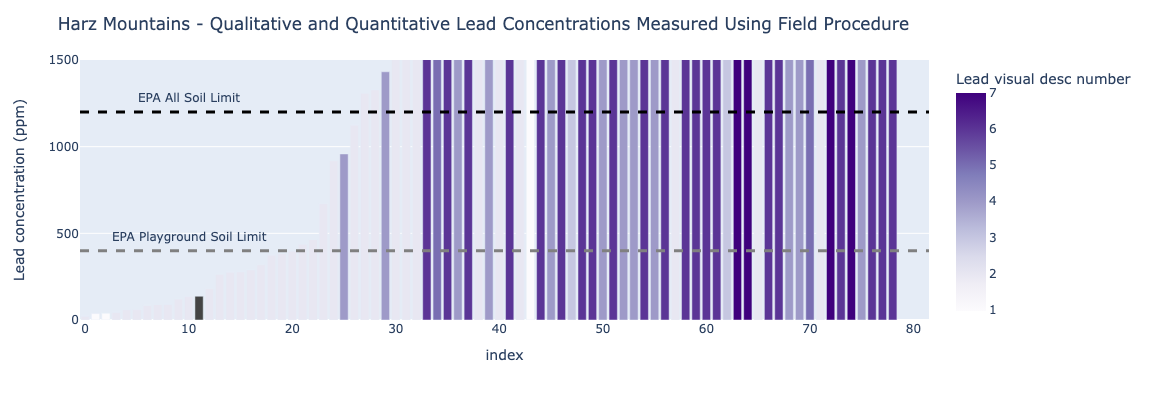

In [104]:
fig = px.bar(sorted_data, x=sorted_data.index, y=sorted_data['Lead concentration (ppm)'], color=sorted_data['Lead visual desc number'],color_continuous_scale=px.colors.sequential.Purples)
fig.update_yaxes(range = [0,1500])
fig.add_hline(y=400, line_width=3, line_dash="dash", line_color="grey")
fig.add_hline(y=1200, line_width=3, line_dash="dash", line_color="black")
fig.add_annotation(x=10, y=400,text="EPA Playground Soil Limit",showarrow=False,yshift=15)
fig.add_annotation(x=10, y=1200,text="EPA All Soil Limit",showarrow=False,yshift=15)
fig.update_layout(height=400,width=1100, title_text='Harz Mountains - Qualitative and Quantitative Lead Concentrations Measured Using Field Procedure')
fig.show()



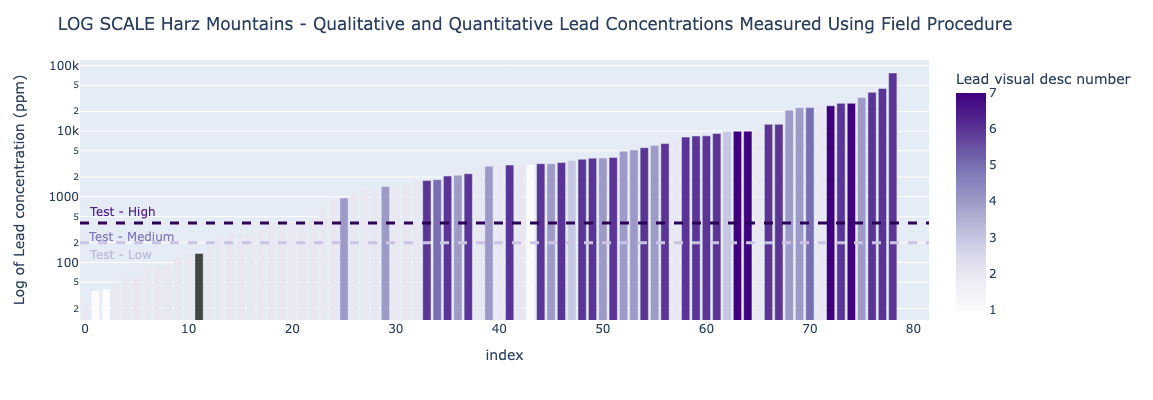

In [106]:
fig = px.bar(sorted_data, x=sorted_data.index, y=sorted_data['Lead concentration (ppm)'], color=sorted_data['Lead visual desc number'],color_continuous_scale=px.colors.sequential.Purples, log_y=True)
fig.update_layout(xaxis_title="index", yaxis_title="Log of Lead concentration (ppm)")
fig.add_hline(y=200, line_width=3, line_dash="dash", line_color="#CBC3E3")
fig.add_hline(y=400, line_width=3, line_dash="dash", line_color="#2a0356")
fig.add_annotation(text="Test - Low",xref="paper", yref="paper",x=0.01, y=0.22, showarrow=False,font=dict(color='#bfbfdd'))
fig.add_annotation(text="Test - Medium",xref="paper", yref="paper",x=0.008, y=0.29, showarrow=False,font=dict(color='#807dba'))
fig.add_annotation(text="Test - High",xref="paper", yref="paper",x=0.01, y=0.42, showarrow=False, font=dict(color='#4e1c8a'))
fig.update_layout(height=400,width=1100, title_text='LOG SCALE Harz Mountains - Qualitative and Quantitative Lead Concentrations Measured Using Field Procedure')
fig.show()

In [109]:
data['Lead Level'] = pd.cut(data['Lead concentration (ppm)'], bins=[0, 400, 1200, float('Inf')], labels=['Playground Safe', 'Normal Safe','Unsafe'])
data

,info,Lead concentration (ppm),Error (ppm),Lead visual desc number,Lead visual desc desc,pH,gps-Latitude,gps-Longitude,gps-Altitude,Lead Level
XRF number,,,,,,,,,,
1555.0,Crop field with barley,464.0,17.0,2.0,low,acidic,51.910843,10.510960,258.7,Normal Safe
1559.0,Barley field in contaminated area,383.0,16.0,2.0,low,NaN,51.910840,10.510907,250.9,Playground Safe
1557.0,Bottom of slag hip near the path,2241.0,39.0,6.0,high,acidic,51.910128,10.509704,264.2,Unsafe
1556.0,Slag heap,9189.0,95.0,6.0,high,acidic,51.910076,10.509595,253.5,Unsafe
1563.0,Slag heap metallophytes near birch tree,8115.0,79.0,6.0,high,acidic,51.910152,10.509579,220.9,Unsafe
...,...,...,...,...,...,...,...,...,...,...
1597.0,"Near wheel tracks, amongst blueberries",1703.0,33.0,2.0,low,NaN,51.892563,10.421937,406.8,Unsafe
1598.0,Tail at stop 3 near restaurant,1327.0,28.0,2.0,low,NaN,51.862207,10.296524,404.6,Unsafe
1599.0,"KS 4th site, near metallophytes but little gre...",10200.0,100.0,2.0,low,NaN,51.941335,10.348589,238.7,Unsafe


In [144]:
aggregated_data = data.groupby(by='Lead Level').count()[['Lead concentration (ppm)']]
aggregated_data

/tmp/ipykernel_947825/4000297132.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,Lead concentration (ppm)
Lead Level,
Playground Safe,21
Normal Safe,6
Unsafe,52


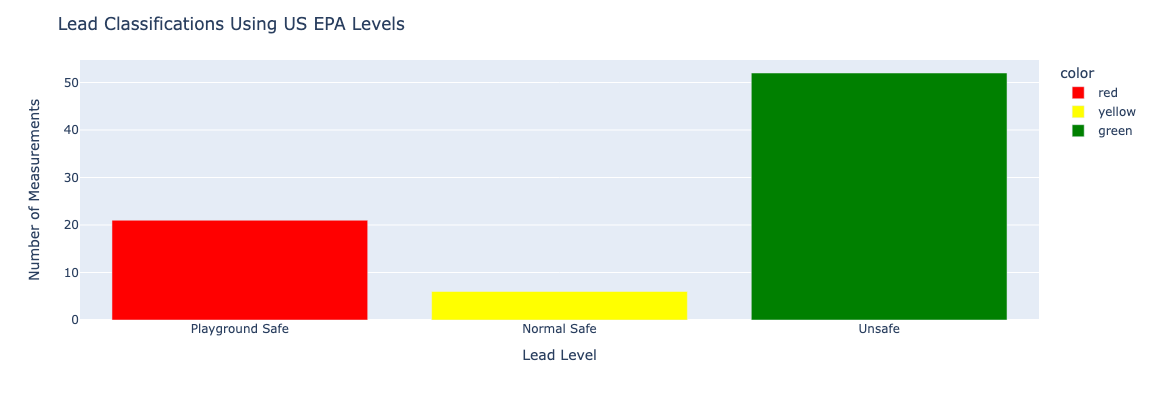

In [160]:
fig = px.bar(
    x=['Playground Safe', 'Normal Safe', 'Unsafe'],
    y=[21,6,52],
    color=['red', 'yellow', 'green'], color_discrete_sequence=['red', 'yellow', 'green'])
fig.update_layout(xaxis_title="Lead Level", yaxis_title="Number of Measurements")
fig.update_layout(height=400,width=1100, title_text='Lead Classifications Using US EPA Levels')

fig
fig.show()


In [161]:
map_data = data[['gps-Latitude', 'gps-Longitude', 'Lead concentration (ppm)']].dropna().values
m = folium.Map([51.9, 10.39], zoom_start=12)
HeatMap(map_data).add_to(m)
m